## Tensors
- 데이터 표현을 위한 기본 구조로 tensor를 사용
- 텐서는 데이터를 담기위한 container로서 일반적으로 수치형 데이터를 저장
- NumPy의 ndarray와 유사
- GPU를 사용한 연산 가속 기능

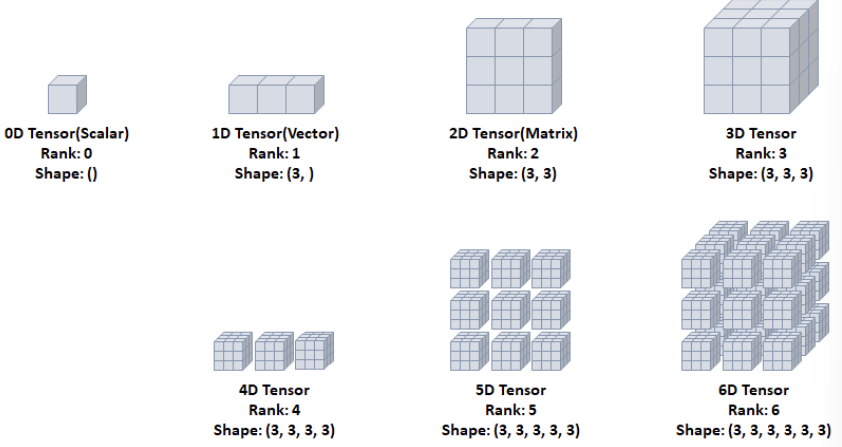

In [1]:
import torch
torch.__version__

'1.11.0+cu113'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4,2)
print(x)

tensor([[3.0214e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30]])


무작위로 초기화된 텐서

In [3]:
x = torch.rand(4, 2)  # 랜덤으로 초기화
print(x)

tensor([[0.3671, 0.3635],
        [0.2254, 0.9994],
        [0.2032, 0.9833],
        [0.7488, 0.1888]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4, 2, dtype=torch.long) # long이기 때문에 integer 형태로 값이 채워짐.
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [6]:
x = torch.tensor([3, 2.3])  # 기본적으로 float 형태로 들어간다.
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [8]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [10]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 1.3903, -0.3328, -2.0057,  0.3118],
        [-0.6284,  0.8656,  0.7497, -1.2415]])


텐서의 크기 계산

In [11]:
print(x.size())

torch.Size([2, 4])


### Data Type

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [12]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [13]:
# type casting(타입 변환)
print(ft.short()) 
print(ft.int())
print(ft.long())  # torch.int64

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [14]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [15]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensor

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [16]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.0104])
-1.0103979110717773
torch.float32


In [17]:
device =torch.device("cuda"if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([-1.0104], device='cuda:0')
tensor([-0.0104], device='cuda:0')
tensor([-0.0104], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [18]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [19]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

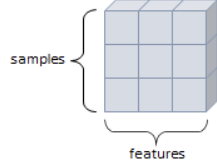

In [20]:
t2 = torch.tensor([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용 

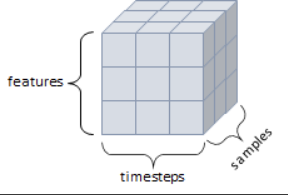

In [21]:
t3 = torch.tensor([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                   [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                   [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

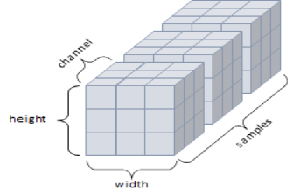

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [22]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a)) # 절대값
print(torch.ceil(a))  # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5))  # -0.5 ~ 0.5 사이에 값이 위치하도록 하는 기능

tensor([[-0.4888, -0.9552]])
tensor([[0.4888, 0.9552]])
tensor([[-0., -0.]])
tensor([[-1., -1.]])
tensor([[-0.4888, -0.5000]])


In [23]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[-0.4888, -0.9552]])
tensor(-0.9552)
tensor(-0.4888)
tensor(-0.7220)
tensor(0.3297)
tensor(0.4669)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [24]:
x = torch.rand(3, 3)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.9942, 0.9461, 0.9509],
        [0.8178, 0.3201, 0.3466],
        [0.7345, 0.9118, 0.3668]])
torch.return_types.max(
values=tensor([0.9942, 0.9461, 0.9509]),
indices=tensor([0, 0, 0]))
torch.return_types.max(
values=tensor([0.9942, 0.8178, 0.9118]),
indices=tensor([0, 0, 1]))


In [25]:
print(x.min(dim=0))
print(x.min(dim=1))

torch.return_types.min(
values=tensor([0.7345, 0.3201, 0.3466]),
indices=tensor([2, 1, 1]))
torch.return_types.min(
values=tensor([0.9461, 0.3201, 0.3668]),
indices=tensor([1, 1, 2]))


In [26]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.5918, 0.5183],
        [0.8491, 0.4332]])


`torch.add`: 덧셈

In [27]:
print(x + y)
print(torch.add(x, y))

tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])


In [28]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  


결과 텐서를 인자로 제공

`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [29]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.5918, 0.5183],
        [0.8491, 0.4332]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])


`torch.sub`: 뺄셈

In [30]:
print(x)
print(y)
print(x- y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])
tensor([[-0.5918, -0.5183],
        [-0.8491, -0.4332]])
tensor([[-0.5918, -0.5183],
        [-0.8491, -0.4332]])
tensor([[-0.5918, -0.5183],
        [-0.8491, -0.4332]])


`torch.mul`: 곱셉

In [31]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])
tensor([[0.2327, 0.1097],
        [0.8693, 0.6494]])
tensor([[0.2327, 0.1097],
        [0.8693, 0.6494]])
tensor([[0.2327, 0.1097],
        [0.8693, 0.6494]])


`torch.div`: 나눗셈

In [32]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])
tensor([[0.3133, 0.2375],
        [0.4140, 0.5879]])
tensor([[0.3133, 0.2375],
        [0.4140, 0.5879]])
tensor([[0.3133, 0.2375],
        [0.4140, 0.5879]])


`torch.mm`: 내적(dot product)

In [33]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # 행렬 분해

tensor([[0.2700, 0.1615],
        [0.5999, 0.6179]])
tensor([[0.8618, 0.6797],
        [1.4490, 1.0511]])
tensor([[0.4667, 0.3532],
        [1.4124, 1.0572]])
tensor([[0.4667, 0.3532],
        [1.4124, 1.0572]])
torch.return_types.svd(
U=tensor([[-0.3149, -0.9491],
        [-0.9491,  0.3149]]),
S=tensor([1.8588, 0.0030]),
V=tensor([[-0.8002,  0.5997],
        [-0.5997, -0.8002]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [34]:
x = torch.Tensor([[1, 2,],
                 [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:,0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추


In [35]:
x = torch.rand(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1) # -1로 설정을 하면, 앞에 shape에 맞춰 크기 값을 계산
print(z)

tensor([[0.9899, 0.3367, 0.4498, 0.4234, 0.9960],
        [0.0431, 0.2265, 0.2102, 0.3629, 0.2671],
        [0.1825, 0.1455, 0.9339, 0.8466, 0.1494],
        [0.0024, 0.4793, 0.1100, 0.3355, 0.5252]])
tensor([0.9899, 0.3367, 0.4498, 0.4234, 0.9960, 0.0431, 0.2265, 0.2102, 0.3629,
        0.2671, 0.1825, 0.1455, 0.9339, 0.8466, 0.1494, 0.0024, 0.4793, 0.1100,
        0.3355, 0.5252])
tensor([[0.9899, 0.3367, 0.4498, 0.4234],
        [0.9960, 0.0431, 0.2265, 0.2102],
        [0.3629, 0.2671, 0.1825, 0.1455],
        [0.9339, 0.8466, 0.1494, 0.0024],
        [0.4793, 0.1100, 0.3355, 0.5252]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [36]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.6190])
0.6189781427383423
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [37]:
x = torch.randn(2)  # 스칼라값이 2개 이상이라 value error 발생
print(x)
print(x.item())
print(x.dtype)

tensor([1.5167, 0.1464])


ValueError: ignored

`squeeze`: 차원을 축소(제거)

In [38]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.3280, 0.0064, 0.0252],
         [0.1233, 0.4921, 0.1146],
         [0.5302, 0.8435, 0.4382]]])
torch.Size([1, 3, 3])


In [39]:
t = tensor.squeeze()  # 제일 앞에 차원이 제거됨
print(t)
print(t.shape)

tensor([[0.3280, 0.0064, 0.0252],
        [0.1233, 0.4921, 0.1146],
        [0.5302, 0.8435, 0.4382]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [40]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.9760, 0.3975, 0.9283],
        [0.5479, 0.7726, 0.0339],
        [0.6601, 0.8080, 0.4226]])
torch.Size([3, 3])


In [41]:
tensor = t.unsqueeze(dim=0) # dim=0 첫 번째 차원을 기준으로 (즉, 첫 번째 기준 idx num이라고 생각하면 됨.)
print(tensor)
print(tensor.shape)

tensor([[[0.9760, 0.3975, 0.9283],
         [0.5479, 0.7726, 0.0339],
         [0.6601, 0.8080, 0.4226]]])
torch.Size([1, 3, 3])


In [42]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.9760],
         [0.3975],
         [0.9283]],

        [[0.5479],
         [0.7726],
         [0.0339]],

        [[0.6601],
         [0.8080],
         [0.4226]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [43]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [44]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0)
print(c)
print(c.size())

tensor([[[-0.0968, -0.4172,  0.5652],
         [-1.5218,  0.4338, -0.5815],
         [-1.3904,  2.4544, -0.9155]]])
tensor([[[ 1.2712,  0.1527, -0.0900],
         [-0.1535, -1.3121, -0.0438],
         [-0.1755, -0.2455,  0.0194]]])
tensor([[[-0.0968, -0.4172,  0.5652],
         [-1.5218,  0.4338, -0.5815],
         [-1.3904,  2.4544, -0.9155]],

        [[ 1.2712,  0.1527, -0.0900],
         [-0.1535, -1.3121, -0.0438],
         [-0.1755, -0.2455,  0.0194]]])
torch.Size([2, 3, 3])


In [45]:
c = torch.cat((a, b), dim=1)
print(c)
print(c.size())

tensor([[[-0.0968, -0.4172,  0.5652],
         [-1.5218,  0.4338, -0.5815],
         [-1.3904,  2.4544, -0.9155],
         [ 1.2712,  0.1527, -0.0900],
         [-0.1535, -1.3121, -0.0438],
         [-0.1755, -0.2455,  0.0194]]])
torch.Size([1, 6, 3])


In [46]:
c = torch.cat((a, b), dim=2)
print(c)
print(c.size())

tensor([[[-0.0968, -0.4172,  0.5652,  1.2712,  0.1527, -0.0900],
         [-1.5218,  0.4338, -0.5815, -0.1535, -1.3121, -0.0438],
         [-1.3904,  2.4544, -0.9155, -0.1755, -0.2455,  0.0194]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [47]:
tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)  # 즉 이 경우엔 (3, 6)이니 6 / 2 = 3 -> 두 개씩 3개로 분할
print(t1)
print(t2)
print(t3)

tensor([[0.8866, 0.9156, 0.8817, 0.4347, 0.4523, 0.8116],
        [0.5046, 0.2717, 0.9157, 0.6567, 0.2489, 0.6102],
        [0.0558, 0.4631, 0.1406, 0.8527, 0.0150, 0.0813]])
tensor([[0.8866, 0.9156],
        [0.5046, 0.2717],
        [0.0558, 0.4631]])
tensor([[0.8817, 0.4347],
        [0.9157, 0.6567],
        [0.1406, 0.8527]])
tensor([[0.4523, 0.8116],
        [0.2489, 0.6102],
        [0.0150, 0.0813]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [48]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.9615, 0.2520, 0.4932, 0.0820, 0.3516, 0.6868],
        [0.4766, 0.4150, 0.8833, 0.8975, 0.9530, 0.6027],
        [0.5007, 0.9862, 0.2614, 0.4665, 0.0623, 0.4921]])
tensor([[0.9615, 0.2520, 0.4932],
        [0.4766, 0.4150, 0.8833],
        [0.5007, 0.9862, 0.2614]])
tensor([[0.0820, 0.3516, 0.6868],
        [0.8975, 0.9530, 0.6027],
        [0.4665, 0.0623, 0.4921]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [49]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [50]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [51]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [52]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)
